# Fitbit Health Tracking analysis as Google Captsone Project
__Project Overview:__

Bellabeat is a successful high-tech manufacturer specializing in health-focused products for women. While currently a small company, Bellabeat possesses significant potential to expand its presence in the global smart device market. Urška Sršen, the cofounder and Chief Creative Officer of Bellabeat, envisions leveraging smart device fitness data analysis to uncover new growth opportunities. 

The project will analyse its competitor Fitbit, to explore the potential applicable insights for Bellabeat. This adopts Google's six-phase methodology: Ask, Prepare, Process, Analyze, and Share.

# 1. Ask
__Stakeholders__

* Urška Sršen - Bellabeat cofounder and Chief Creative Officer
* Sando Mur - Bellabeat cofounder and key member of Bellabeat executive team
* Bellabeat Marketing Analytics team

__Goals__
* Identify trends and pattern of device usage
* Identify applicable insights for future marketing strategy
* Find out missing pieces, potential for improve user experience

# 2. Prepare
The data source used for the project is [FitBit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit/data) on kaggle.

I used the updated dataset with 18 csv files named "mturkfitbit_export_4.12.16-5.12.16" which is validated as open data source. Thirty eligible Fitbit users provided consent to submit their personal tracker data, which includes minute-level information on physical activity, heart rate, and sleep monitoring.

The overview of all 18 files are as below: 

| Table Name              | Attributes                                                                                           | Description |
|-------------------------|------------------------------------------------------------------------------------------------------|------------|
| dailyActivity           | Id, ActivityDate, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDistance, VeryActiveDistance, ModeratelyActiveDistance, LightActiveDistance, SedentaryActiveDistance, VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes, Calories   | daily activity summary |
| dailyCalories           | Id, ActivityDay, Calories                                      | included in the dailyActivity |
| dailyIntensities        | Id, ActivityDay, SedentaryMinutes, LightlyActiveMinutes, FairlyActiveMinutes, VeryActiveMinutes, SedentaryActiveDistance, LightActiveDistance, ModeratelyActiveDistance, VeryActiveDistance | included in the dailyActivity |
| dailySteps              | Id, ActivityDay, StepTotal                                     | included in the dailyActivity |
| heartrate_seconds       | Id, Time, Value                                                | heartrate recorded by second  |
| hourlyCalories          | Id, ActivityHour, Calories                                     | hourly caleries record        | 
| hourlyIntensities       | Id, ActivityHour, TotalIntensity, AverageIntensity             | hourly intensities record     |
| hourlySteps             | Id, ActivityHour, StepTotal                                    | hourly steps record           |
| minuteCaloriesNarrow    | Id, ActivityMinute, Calories                                   | minute calories in long format    |
| minuteCaloriesWide      | Id, ActivityHour, Calories00 - Calories59                      | minute calries in wide format     |
| minuteIntensitiesNarrow | Id, ActivityMinute, Intensity                                  | minute intensities in long format |
| minuteIntensitiesWide   | Id, ActivityHour, Intensity00 - Intensity59                    | minute intensities in wide format |
| minuteMETsNarrow        | Id, ActivityMinute, METs                                       | minute METs                       |
| minuteSleep             | Id, date, value, logId                                         | minute sleep with logid           |
| minuteStepsNarrow       | Id, ActivityMinute, Steps                                      | minute steps in long format       |
| minuteStepsWide         | Id, ActivityHour, Steps00 - Steps59                            | minute steps in wide format       |
| sleepDay                | Id, SleepDay, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed    | sleep summary             |
| weightLogInfo           | Id, Date, WeightKg, WeightPounds, Fat, BMI, IsManualReport, LogId      | weight info               |

__Data Summary__
* activity( steps, intensity and calories): daily, hourly and minute
* heartrate (by second)
* sleep
* weight  

It's a very detail recorded data, but i would like to focus first on the big picture - how does the users everyday life look like? Therefore, the file of dailyActiviy, a merged file of hourlyActivity, sleepDay and weightLogInfo will be anaylsed. If there's further questions need to be answered, the minutes will then be used.  

Here are some questions I would like to answer:

* User demographics: How do users look like?
* Effective way of burning calories
* What impact sleeping quality?
* Correlation between active time, sendentary time, sleep qulity and calories burn

#  3. Process
This section will focus on inspecting the data and identify the be ready for analysis. 

To have a nice overview here is a checklist what i will do:
* load libraries, load files
* deal with: missing value, dulpication, datatype, date format
* merge/ create necessary columns and dataframe

## 3.1 Hourly data

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load hour related data
hourlyCalories = pd.read_csv(r"C:\Users\s8803\OneDrive\文件\mturkfitbit_export_4.12.16-5.12.16\Fitabase Data 4.12.16-5.12.16\hourlyCalories_merged.csv")
hourlyIntensities = pd.read_csv(r"C:\Users\s8803\OneDrive\文件\mturkfitbit_export_4.12.16-5.12.16\Fitabase Data 4.12.16-5.12.16\hourlyIntensities_merged.csv")
hourlySteps = pd.read_csv(r"C:\Users\s8803\OneDrive\文件\mturkfitbit_export_4.12.16-5.12.16\Fitabase Data 4.12.16-5.12.16\hourlySteps_merged.csv")

# Merge the data of hourly calories, hourly intensities, and hourly steps
h_activity = hourlyCalories.merge(hourlyIntensities, on=['Id', 'ActivityHour']).merge(hourlySteps, on=['Id', 'ActivityHour'])


In [3]:
# confirm the merged data hourly activity
print(h_activity.head())

           Id           ActivityHour  Calories  TotalIntensity  \
0  1503960366  4/12/2016 12:00:00 AM        81              20   
1  1503960366   4/12/2016 1:00:00 AM        61               8   
2  1503960366   4/12/2016 2:00:00 AM        59               7   
3  1503960366   4/12/2016 3:00:00 AM        47               0   
4  1503960366   4/12/2016 4:00:00 AM        48               0   

   AverageIntensity  StepTotal  
0          0.333333        373  
1          0.133333        160  
2          0.116667        151  
3          0.000000          0  
4          0.000000          0  


## 3.2 Data Inspection

Inspection of daily activity, hourly activity, sleep and weight.
Quick summary of the section:
* 65 missing values of fat from daily weight log
* 3 duplication spotted and removed
* datatype alter:
    * Id numbers, Log id: integer >  string
    * ActivityDate: object > datetime

In [5]:
# Load the data of daily activity, sleep, and weight
d_activity = pd.read_csv(r"C:\Users\s8803\OneDrive\文件\mturkfitbit_export_4.12.16-5.12.16\Fitabase Data 4.12.16-5.12.16\dailyActivity_merged.csv")
d_sleep = pd.read_csv(r"C:\Users\s8803\OneDrive\文件\mturkfitbit_export_4.12.16-5.12.16\Fitabase Data 4.12.16-5.12.16\sleepDay_merged.csv")
d_weight = pd.read_csv(r"C:\Users\s8803\OneDrive\文件\mturkfitbit_export_4.12.16-5.12.16\Fitabase Data 4.12.16-5.12.16\weightLogInfo_merged.csv")

In [5]:
# check the missing values
print(d_activity.isnull().sum())
print(h_activity.isnull().sum())
print(d_sleep.isnull().sum())
print(d_weight.isnull().sum())


Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64
Id                  0
ActivityHour        0
Calories            0
TotalIntensity      0
AverageIntensity    0
StepTotal           0
dtype: int64
Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64
Id                 0
Date               0
WeightKg           0
WeightPounds       0
Fat               65
BMI                0
IsManualReport     0
LogId              0
dtype: int64


In [6]:
# check the duplicated values
print(d_activity.duplicated().sum())
print(d_sleep.duplicated().sum())
print(d_weight.duplicated().sum())


0
3
0


In [7]:
# remove the duplicated values
d_sleep.drop_duplicates(inplace=True)


In [8]:
# confirm the datatype
print(d_activity.dtypes)
print(d_sleep.dtypes)
print(d_weight.dtypes)


Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object
Id                     int64
SleepDay              object
TotalSleepRecords      int64
TotalMinutesAsleep     int64
TotalTimeInBed         int64
dtype: object
Id                  int64
Date               object
WeightKg          float64
WeightPounds      float64
Fat               float64
BMI               float64
IsManualReport       bool
LogId               int64
dtype: object


In [15]:
# Change the datatype of Id number to string, logID to string and date to datetime
d_activity['Id'] = d_activity['Id'].astype(str)
d_activity['ActivityDate'] = pd.to_datetime(d_activity['ActivityDate']).dt.date
h_activity['Id'] = h_activity['Id'].astype(str)
h_activity['ActivityHour'] = pd.to_datetime(h_activity['ActivityHour'])
d_sleep['Id'] = d_sleep['Id'].astype(str)
d_sleep['SleepDay'] = pd.to_datetime(d_sleep['SleepDay']).dt.date
d_weight['Id'] = d_weight['Id'].astype(str)
d_weight['Date'] = pd.to_datetime(d_weight['Date']).dt.date


In [17]:
# Hourly activity time stamps, extract the hour, and date
h_activity['AcHour'] = h_activity['ActivityHour'].dt.hour
h_activity['AcDate'] = h_activity['ActivityHour'].dt.date


## 3.3 Light Exploration

Summary of the initial exploration below:

* There are 33 users who have logged data for a full 31-day period. 
* Only 24 users have recorded sleep data
* 8 users have logged their weight

In [10]:
# confirm the unique id number
print(d_activity['Id'].nunique())
print(h_activity['Id'].nunique())
print(d_sleep['Id'].nunique())
print(d_weight['Id'].nunique())


33
33
24
8


In [11]:
# remove the exessive value from h_activity where the id number is not in d_activity
h_activity = h_activity[h_activity['Id'].isin(d_activity['Id'])]

# confirm the unique id number of h_activity
print(h_activity['Id'].nunique())

33


In [16]:
# confirm the number of the day logs
print(d_activity['ActivityDate'].nunique())
print(d_sleep['SleepDay'].nunique())
print(d_weight['Date'].nunique())


31
31
31


Summary of the initial exploration below:

__Activity__ 
* the average steps are 7637.91 with 5.49km a day. 
* The majority of the users are lightly active with the aveage of 192 minutes. 
* The sedentary time spent is as high as 991 minutes,  which is 16.52 hours. 
* The average caleries burned is 2303 a day. 

We could determine that the users are not especially active and definately need more active minutes.

__Sleep__ 

For those 24 users who recorded their sleep time have...
* an average time of 419.17 minutes which is 6.99 hours
* sleep once a day 
* take in average 37.31 minutes to fall asleep

__Weight__

For those 8 users who recorded their wight info have...
* an average weight of 72 kgs and BMI of 25. 

while the recommended healthy BMI is between 18.5 and 24.9, we could assume these 8 users out of 33 users (25%) might have the goal of losing weight. To note that there is one outlier whose weight lies at 133 kgs might skewed the average. 

Owing to the lack of information, the weight analysis part will not be continued

In [13]:
# initial data exploration
print(d_activity.describe())
print(h_activity.describe())
print(d_sleep.describe())
print(d_weight.describe())


                        ActivityDate    TotalSteps  TotalDistance  \
count                            940    940.000000     940.000000   
mean   2016-04-26 06:53:37.021276672   7637.910638       5.489702   
min              2016-04-12 00:00:00      0.000000       0.000000   
25%              2016-04-19 00:00:00   3789.750000       2.620000   
50%              2016-04-26 00:00:00   7405.500000       5.245000   
75%              2016-05-04 00:00:00  10727.000000       7.712500   
max              2016-05-12 00:00:00  36019.000000      28.030001   
std                              NaN   5087.150742       3.924606   

       TrackerDistance  LoggedActivitiesDistance  VeryActiveDistance  \
count       940.000000                940.000000          940.000000   
mean          5.475351                  0.108171            1.502681   
min           0.000000                  0.000000            0.000000   
25%           2.620000                  0.000000            0.000000   
50%           5.24

In [18]:
# create a column of time cannot sleep
d_sleep['CantSleep'] = d_sleep['TotalTimeInBed'] - d_sleep['TotalMinutesAsleep']


Merge activity and sleep data for further use

In [53]:
# Before merging, ensure that 'ActivityDate' in d_activity and 'SleepDate' in d_sleep are in the same format
d_activity['ActivityDate'] = pd.to_datetime(d_activity['ActivityDate']).dt.date
d_sleep['SleepDate'] = pd.to_datetime(d_sleep['SleepDay']).dt.date

# Now merge the dataframes
combined_data = d_activity.merge(d_sleep, left_on=['Id', 'ActivityDate'], right_on=['Id', 'SleepDate'], how='outer')

# confirm the unique id number
print(combined_data['Id'].nunique())


33


C:\Users\s8803\AppData\Local\Temp\ipykernel_4804\3480817566.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  d_sleep['SleepDate'] = pd.to_datetime(d_sleep['SleepDay']).dt.date


## 3.4 Correlation

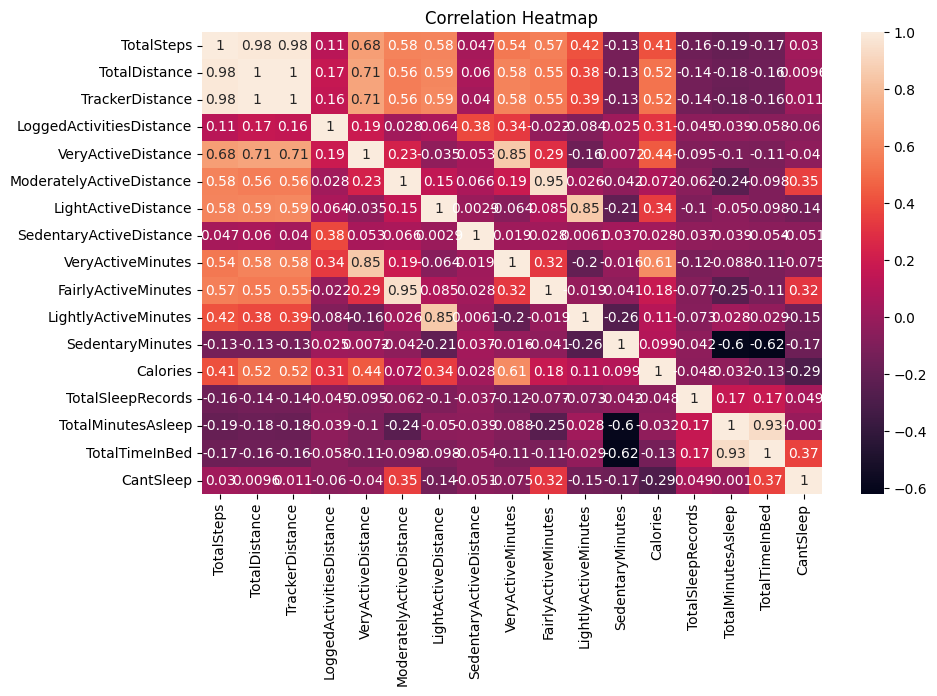

In [35]:
# show the heapmap of the combined data excluding the id number and time
plt.figure(figsize=(10, 6))
sns.heatmap(combined_data.drop(['Id', 'ActivityDate', 'SleepDay',"SleepDate"], axis=1).corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()


Heatmap shows
* high correlation of "very active minutes" and "calories" 
* high negetive correlation of "sendentary minutes" and "minutes asleep"
* light correlation between "time took to fall asleep" and " moderately active distance" and "fairly active minutes" 

# 4. Analyse and Share
Since we are missing out further demogrphic info of the users, we can try to determine different user types by the data in our hand.

## 4.1 Usertype 

First, summarize each users(id) average activity, sleep.

In [34]:
# Group by 'id' and calculate means
d_average_id = combined_data.groupby('Id').agg(
    mean_daily_steps=pd.NamedAgg(column='TotalSteps', aggfunc='mean'),
    mean_daily_calories=pd.NamedAgg(column='Calories', aggfunc='mean'),
    mean_daily_lightly_active=pd.NamedAgg(column='LightlyActiveMinutes', aggfunc='mean'),
    mean_daily_fairly_active=pd.NamedAgg(column='FairlyActiveMinutes', aggfunc='mean'),
    mean_daily_very_active=pd.NamedAgg(column='VeryActiveMinutes', aggfunc='mean'),    
    mean_daily_sleep=pd.NamedAgg(column='TotalMinutesAsleep', aggfunc=lambda x: x.mean(skipna=True)),
    mean_daily_sendentary=pd.NamedAgg(column='SedentaryMinutes', aggfunc='mean')
    
).reset_index()  # Reset index to make 'id' a column again

# Print the first few rows of the dataframe
print(d_average_id.head())


           Id  mean_daily_steps  mean_daily_calories  \
0  1503960366      12116.741935          1816.419355   
1  1624580081       5743.903226          1483.354839   
2  1644430081       7282.966667          2811.300000   
3  1844505072       2580.064516          1573.483871   
4  1927972279        916.129032          2172.806452   

   mean_daily_lightly_active  mean_daily_fairly_active  \
0                 219.935484                 19.161290   
1                 153.483871                  5.806452   
2                 178.466667                 21.366667   
3                 115.451613                  1.290323   
4                  38.580645                  0.774194   

   mean_daily_very_active  mean_daily_sleep  mean_daily_sendentary  
0               38.709677            360.28             848.161290  
1                8.677419               NaN            1257.741935  
2                9.566667            294.00            1161.866667  
3                0.129032            6

Classify the users by activity considering the daily amount of steps. 
It is categorized as follows:

* Sedentary - Less than 5000 steps a day.
* Lightly active - Between 5000 and 7499 steps a day.
* Fairly active - Between 7500 and 9999 steps a day.
* Very active - More than 10000 steps a day.

Classification has been made per the following article [here](https://www.10000steps.org.au/articles/counting-steps/).


In [94]:
# Define a function to map 'mean_daily_steps' to 'user_type'
def map_user_type(mean_daily_steps):
    if mean_daily_steps < 5000:
        return "sedentary"
    elif 5000 <= mean_daily_steps < 7500:
        return "lightly active"
    elif 7500 <= mean_daily_steps < 10000:
        return "fairly active"
    else:
        return "very active"

# Apply the function to create 'user_type' column
d_average_id['user_type'] = d_average_id['mean_daily_steps'].apply(map_user_type)

Visualize the percentage of user type

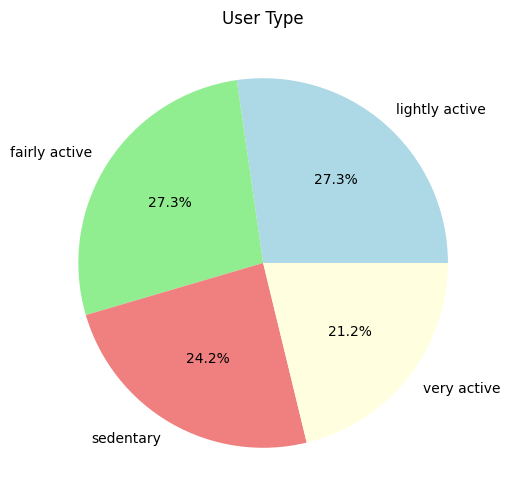

In [91]:
# visualize the percentage of user type using pie chart
plt.figure(figsize=(10, 6))
plt.pie(d_average_id['user_type'].value_counts(normalize=True) * 100, labels=d_average_id['user_type'].value_counts(normalize=True).index, autopct='%1.1f%%',colors= ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow'])
plt.title('User Type')
plt.show()

* the user types are fairly distributed

[HealthLine, 2023](https://www.healthline.com/health/how-many-steps-a-day#is-10-000-too-high)
points out: 
* Step range for healthy adults are 4,000 - 18,000 steps/day 
* 10,000 can beconsidered a reasonable target for a healthy adult
* Optimal steps can vary by age:
    * Up to 60 years: 8,000-10,000 steps/day for health
    * Over 60 years: 6,000-8,000 steps/day may be sufficient
* Individual factors like lifestyle and fitness goals(losing weight, maintain fitness level, etc)  also influence step recommendations



## 4.2 Sleep Quality vs Steps

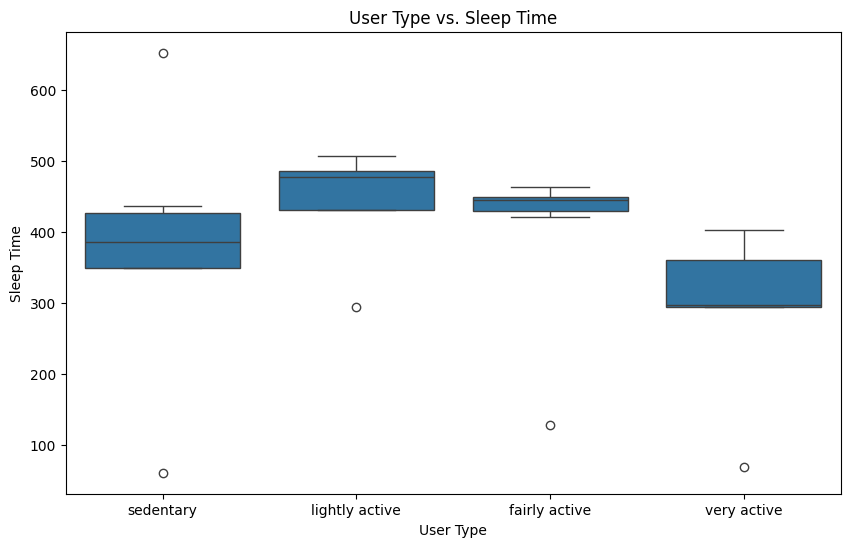

In [89]:
# correlation between user type and its sleep time
plt.figure(figsize=(10, 6))
order = ['sedentary', 'lightly active', 'fairly active', 'very active']
sns.boxplot(x='user_type', y='mean_daily_sleep', data=d_average_id, order = order)
plt.xlabel('User Type')
plt.ylabel('Sleep Time')
plt.title('User Type vs. Sleep Time')
plt.show()


The graph above shows:
* sendentary behavior may affect an individual's sleep time
* being very active may also disrupt a person's sleep time
It is potentially influenced by various factors such as gender, age, and lifestyle choices.

However, in general, findings suggested "daily walking steps showed a positive correlation with sleep efficiency, and an inverse correlation with time spent awake after initially falling asleep."([Dr.Biali](https://susanbiali.com/sleep-better-take-more-steps/#:~:text=These%20Japanese%20researchers%20found%20that,lots%20of%20steps%20every%20day.), 2023 )

## 4.3 Activity Level vs Calories

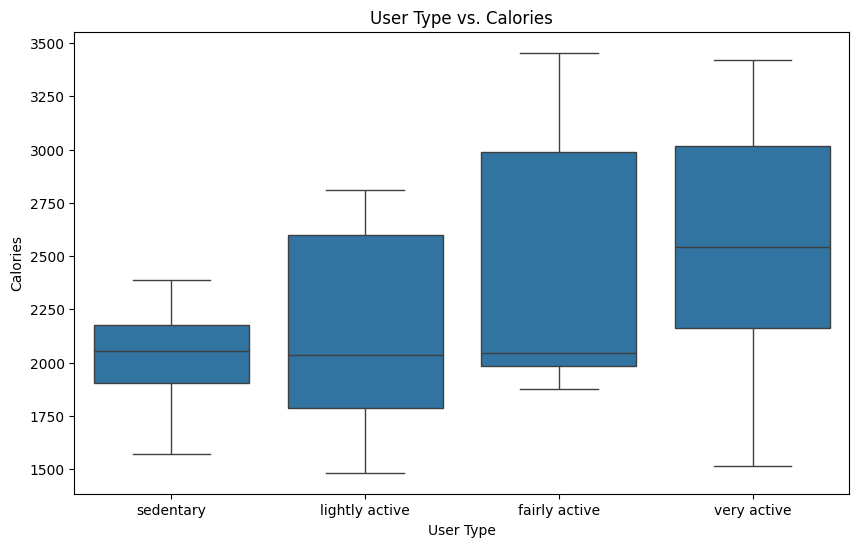

In [90]:
# correlation between user type and its calories
plt.figure(figsize=(10, 6))
order = ['sedentary', 'lightly active', 'fairly active', 'very active']
sns.boxplot(x='user_type', y='mean_daily_calories', data=d_average_id, order = order)
plt.xlabel('User Type')
plt.ylabel('Calories')
plt.title('User Type vs. Calories')
plt.show()

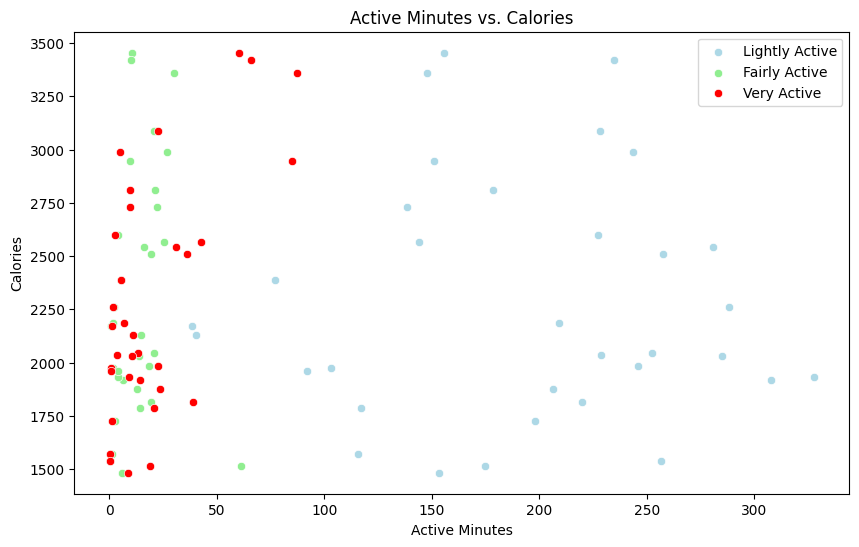

In [99]:
# correlation between different acitve minutes and calories burnt
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mean_daily_lightly_active', y='mean_daily_calories', data=d_average_id, color='lightblue', label='Lightly Active')
sns.scatterplot(x='mean_daily_fairly_active', y='mean_daily_calories', data=d_average_id, color='lightgreen', label='Fairly Active')
sns.scatterplot(x='mean_daily_very_active', y='mean_daily_calories', data=d_average_id, color='red', label='Very Active')
plt.xlabel('Active Minutes')
plt.ylabel('Calories')
plt.title('Active Minutes vs. Calories')
plt.legend()
plt.show()

The finding between activity level and calories burn:
* Unsuprisingly, clear positive correlation between activity and calories are shown
* Engaging in moderately active minutes can yield equivalent benefits in terms of calorie burn

This phenomenon may be attributed to various factors, such as the type of physical activity performed—certain exercises, like running, are known to effectively burn calorie [(Nunez, 2023)](https://www.healthline.com/health/what-exercise-burns-the-most-calories#_noHeaderPrefixedContent). Additionally, individuals with higher metabolism rates, as described by the [Mayo Clinic (n.d.)](https://www.mayoclinic.org/healthy-lifestyle/weight-loss/in-depth/metabolism/art-20046508), may experience increased calorie expenditure during physical activity.

## 4.4 Hourly Activity

In [56]:
# change the data type of 'Id' to string and 'ActivityHour' to datetime
h_activity['Id'] = h_activity['Id'].astype(str)
h_activity['ActivityHour'] = pd.to_datetime(h_activity['ActivityHour'])

# seperate hour and date from the hourly activity
h_activity['AcHour'] = h_activity['ActivityHour'].dt.hour
h_activity['AcDate'] = h_activity['ActivityHour'].dt.date


C:\Users\s8803\AppData\Local\Temp\ipykernel_4804\1270073231.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('RdYlGn')
C:\Users\s8803\AppData\Local\Temp\ipykernel_4804\1270073231.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hourly_steps_avg, x='AcHour', y='average_steps', palette=colors)
C:\Users\s8803\AppData\Local\Temp\ipykernel_4804\1270073231.py:15: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(data=hourly_steps_avg, x='AcHour', y='average_steps', palette=colors)


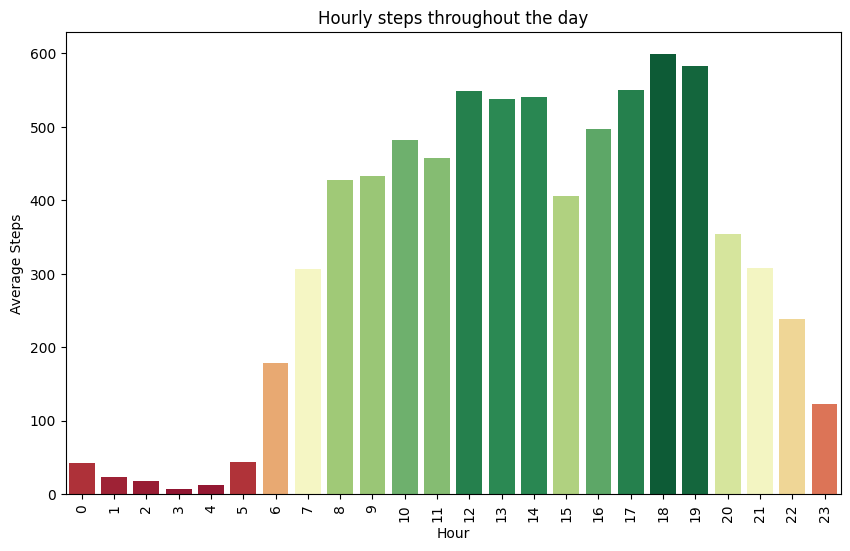

In [88]:
# Group by time and calculate average steps
hourly_steps_avg = h_activity.groupby('AcHour').agg(average_steps=('StepTotal', 'mean')).reset_index()

# Create a color map

from matplotlib import cm
from matplotlib.colors import Normalize

cmap = cm.get_cmap('RdYlGn')
norm = Normalize(vmin=hourly_steps_avg['average_steps'].min(), vmax=hourly_steps_avg['average_steps'].max())
colors = cmap(norm(hourly_steps_avg['average_steps']))

# Plot the data with colored bars
plt.figure(figsize=(10, 6))
sns.barplot(data=hourly_steps_avg, x='AcHour', y='average_steps', palette=colors)
plt.title('Hourly steps throughout the day')
plt.xlabel('Hour')
plt.ylabel('Average Steps')
plt.xticks(rotation=90)
plt.show()


Findings: 

* users are active between 7am to 8pm. 
* peaks are between 12-2pm and 5-7pm way

# 5. Act

Before proceeding with recommendations, it's important to acknowledge the data limitations and understand Bellabeat's core business focus. 
Bellabeat targets young women, offering holistic wellness services beyond physical activity tracking, including sleep quality, stress management, mindfulness, and menstruation tracking. Bellabeat offers a range of products tailored to enhance wellness. These include aesthetic accessories trackers such as Leaf and Ivy+, watch trackers like Time, as well as their app and Premium coaching service.

Despite the lack of detailed demographic information, we aim to compensate by drawing insights from broader trends and patterns.

__Analysis and Recommendations__


1. __Clear Goal Setting:__

    At the forefront of our recommendations is the importance of personalized goal setting. This initial step is foundational, as it sets the tone for the subsequent strategies. Instead of adopting a one-size-fits-all approach, Bellabeat should encourage users to set personalized wellness goals. Analysis of the usertype shows that the fitness level varies a lots and the those 8 weight logging users might have the goals to lose weight.  By allowing users to define their objectives based on individual preferences and fitness levels, the platform can better tailor its recommendations and foster a sense of ownership over one’s health journey.

2. __Tailored Steps Goals:__

    While the notion of achieving 10,000 steps per day is widely advocated, Bellabeat should recognize that every user is unique. According to 
[HealthLine (2023)](https://www.healthline.com/health/how-many-steps-a-day#is-10-000-too-high), the Step range for healthy adults varies from 4,000 to 18,000 steps per day. Therefore, the recommendations regarding physical activity should be personalized based on factors such as age, fitness level, and lifestyle. 

3. __Promote Effective Way of Goal Reaching:__ 
    
    The analysis indicates that moderately active minutes can burn calories similarly to highly active minutes, highlighting the importance of effective goal attainment. Users have varying objectives, from weight loss to improving sleep quality, and the effectiveness of strategies depends on personal metabolism [(Mayo Clinic, n.d.)](https://www.mayoclinic.org/healthy-lifestyle/weight-loss/in-depth/metabolism/art-20046508) and chosen activities [(Kunez, 2023)](https://www.healthline.com/health/what-exercise-burns-the-most-calories#_noHeaderPrefixedContent). To address this diversity, Bellabeat can use its existing tracker items and offerings to develop tailored programs, including diverse workouts, nutritional guidance, and lifestyle tips, aligning with individual needs and preferences.

4. __Sleep Quality Enhancement:__

    Our analysis reveals that increased sitting time may lead to shorter sleep duration, while very active minutes are also associated with reduced sleep. Studies suggest that adults with lower stress levels tend to sleep more than those with higher stress levels, indicating a correlation between sleep quality and stress management [(American Psychologocal Assiciation, 2013)](https://www.apa.org/news/press/releases/stress/2013/sleep#:~:text=Adults%20who%20sleep%20fewer%20than,6.2%20hours)).  Given the significant impact of sleep on overall wellness, Bellabeat should prioritize features aimed at improving sleep quality. This could involve leveraging data insights to provide personalized recommendations for optimizing sleep patterns, creating a conducive sleep environment, and managing stress levels before bedtime.

5. __Optimizing Notification Sending Time:__
    
    Our analysis reveals a user pattern of high activity levels around lunchtime (12-2 pm) and dinner time (5-7 pm), with an average of 500 steps per hour during these periods. Recognizing that timing plays a crucial role in user engagement, Bellabeat should analyze user behavior patterns to determine the most effective times for sending notifications. By delivering timely reminders and updates, the platform can enhance user engagement and adherence to wellness goals.

__Conclusion__

In conclusion, by addressing the limitations of the available data and aligning recommendations with Bellabeat's core business and service offerings, we can optimize the platform's effectiveness in promoting holistic wellness among young women. By adopting a personalized approach, leveraging data insights, and incorporating user-centric features, Bellabeat can empower individuals to take control of their health and well-being in a meaningful and sustainable manner.









__Reference__


*Biali, S. (2023, May 11). If you want to sleep better, take more steps | Dr. Susan Biali Haas. Dr. Susan Biali Haas. https://susanbiali.com/sleep-better-take-more-steps/#:~:text=These%20Japanese%20researchers%20found%20that,lots%20of%20steps%20every%20day.*

*Counting your steps. (n.d.). 10,000 Steps. https://www.10000steps.org.au/articles/healthy-lifestyles/counting-steps/*

*Lindberg, S. (2023, June 1). How many steps do I need a day? Healthline. https://www.healthline.com/health/how-many-steps-a-day*

*Metabolism and weight loss: How you burn calories. (2022, October 8). Mayo Clinic. https://www.mayoclinic.org/healthy-lifestyle/weight-loss/in-depth/metabolism/art-20046508*

*Nunez, K. (2023, March 20). 12 exercises that burn the most calories. Healthline. https://www.healthline.com/health/what-exercise-burns-the-most-calories#_noHeaderPrefixedContent*

*Stress and sleep. (2013, January 1). https://www.apa.org. https://www.apa.org/news/press/releases/stress/2013/sleep#:~:text=Adults%20who%20sleep%20fewer%20than,6.2%20hours*
